<a href="https://colab.research.google.com/github/zolumn/keras_materials/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
x_val=x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val)
)

Epoch 1/20
30/30 [==============================] - 16s 62ms/step - loss: 0.6052 - accuracy: 0.7125 - val_loss: 0.4396 - val_accuracy: 0.8108
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3440 - accuracy: 0.8944 - val_loss: 0.3205 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2323 - accuracy: 0.9332 - val_loss: 0.2840 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1892 - accuracy: 0.9413 - val_loss: 0.2734 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1434 - accuracy: 0.9574 - val_loss: 0.2787 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1168 - accuracy: 0.9699 - val_loss: 0.3014 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1007 - accuracy: 0.9711 - val_loss: 0.3032 - val_accuracy: 0.8847
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

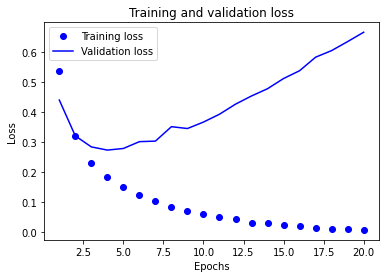

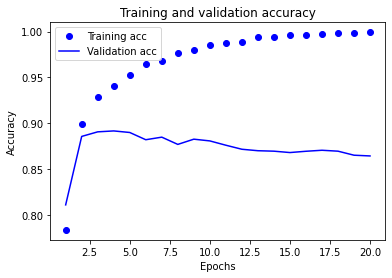

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.fit(
    x_train,
    y_train,
    epochs = 4,
    batch_size = 512
)
results = model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2185 - accuracy: 0.9476
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1377 - accuracy: 0.9601
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1125 - accuracy: 0.9665
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.4720 - accuracy: 0.8593


[0.4720437824726105, 0.8593199849128723]

In [ ]:
model.predict(x_test)

array([[0.04212776],
       [1.        ],
       [0.9071249 ],
       ...,
       [0.1683403 ],
       [0.06250253],
       [0.92690027]], dtype=float32)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(
    x_train,
    y_train,
    epochs = 4,
    batch_size = 512
)
results = model.evaluate(x_test,y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.5325 - accuracy: 0.7519
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2857 - accuracy: 0.9069
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2198 - accuracy: 0.9258
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2798 - accuracy: 0.8887


[0.279791921377182, 0.8887199759483337]